# Import Libraries

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor   # for checking no multicolinearity

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report  # evaluation matrics

from sklearn.svm import SVC

# 1. Problem Statement

# 2. Data Gathering

In [41]:
df = pd.read_csv(r"D:\Swarali\datasets\new_train.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


# 3. EDA Exploratory Data Analysis

In [42]:
df.shape  #to check the no of rows and columns

(32950, 16)

In [43]:
df.info()   # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [44]:
df.describe()  #Display summary statistics for numerical features

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [45]:
df.isna().sum()  # to check null values

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [46]:
pd.value_counts(df["y"]) # to check the count of target column

y
no     29238
yes     3712
Name: count, dtype: int64

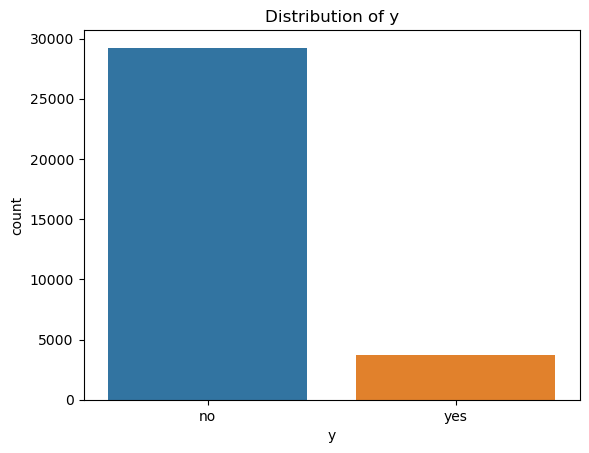

In [47]:
# Visualize the distribution of the target variable 'y'

plt.title("Distribution of y")
sns.countplot(x='y', data=df)

plt.show()

<Axes: xlabel='age', ylabel='Count'>

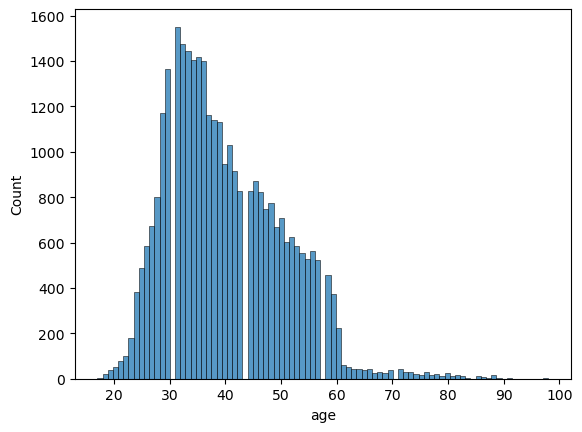

In [48]:
sns.histplot(df["age"]) # to see distribution of age column using histogram

<Axes: xlabel='age', ylabel='Density'>

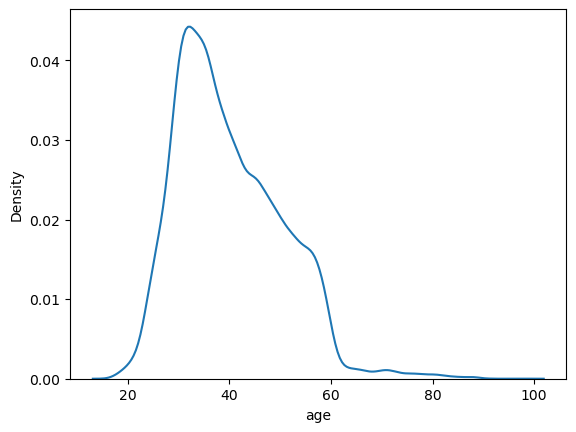

In [49]:
sns.kdeplot(df["age"])  # to see the distribution of age column using kdeplot

<Axes: xlabel='duration', ylabel='Count'>

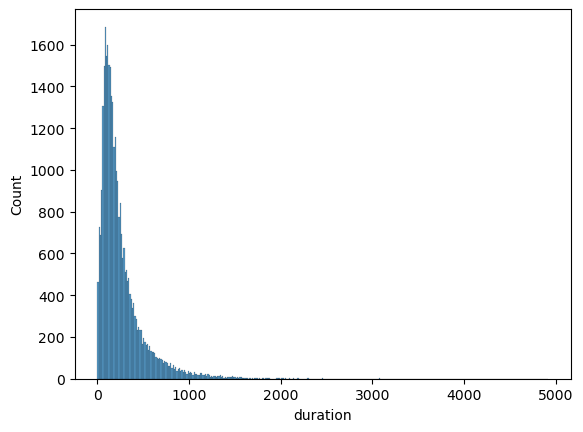

In [50]:
sns.histplot(df['duration'])  # to see distribution of duration column using histogram

<Axes: xlabel='duration', ylabel='Density'>

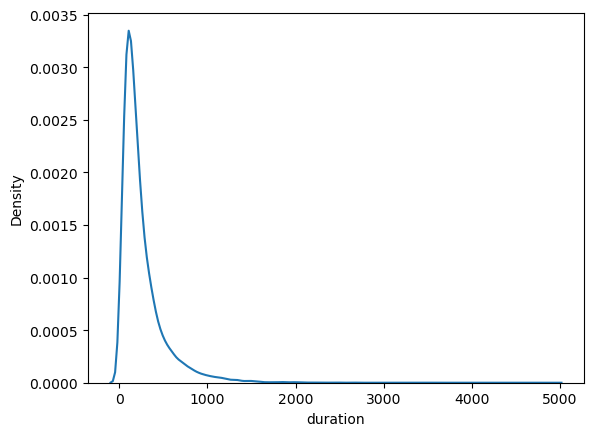

In [51]:
sns.kdeplot(df['duration'])  # to see distribution of duration column using kdeplot

<Axes: xlabel='campaign', ylabel='Count'>

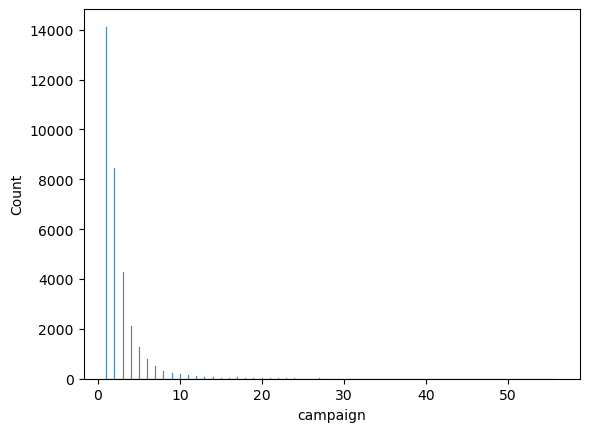

In [52]:
sns.histplot(df['campaign']) # to see distribution of campaign column using histogram

<Axes: xlabel='campaign', ylabel='Density'>

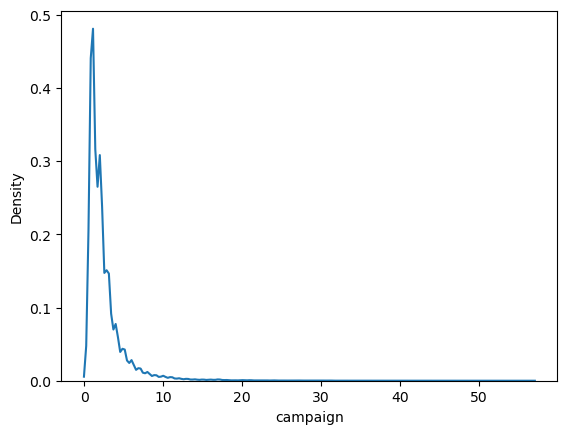

In [53]:
sns.kdeplot(df['campaign'])# to see distribution of campaign column using kdeplot

<Axes: xlabel='pdays', ylabel='Count'>

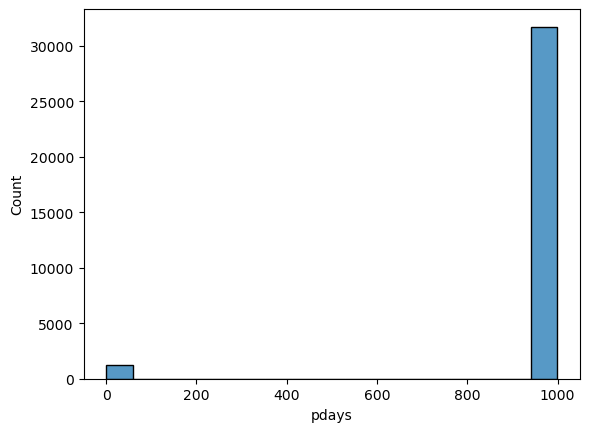

In [54]:
sns.histplot(df["pdays"])  # to see distribution of pdays column using histogram

<Axes: xlabel='pdays', ylabel='Density'>

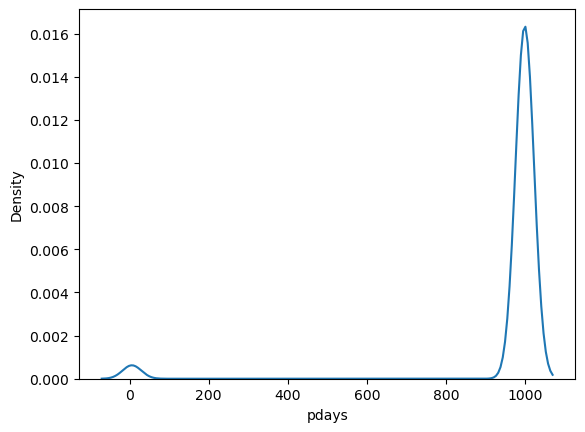

In [55]:
sns.kdeplot(df["pdays"])# to see distribution of pdays column using kdeplot

<Axes: xlabel='previous', ylabel='Count'>

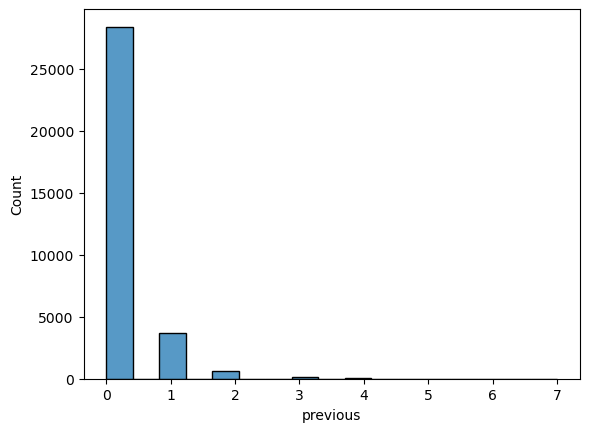

In [56]:
sns.histplot(df["previous"])   # to see distribution of previous column using histogram

<Axes: xlabel='previous', ylabel='Density'>

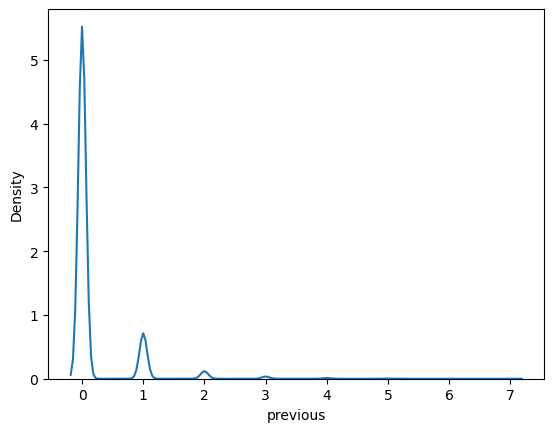

In [57]:
sns.kdeplot(df["previous"]) # to see distribution of previous column using kdeplot

In [58]:
cat_var= df.select_dtypes(include= ["object"]).columns   # select categorical columns
cat_var 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

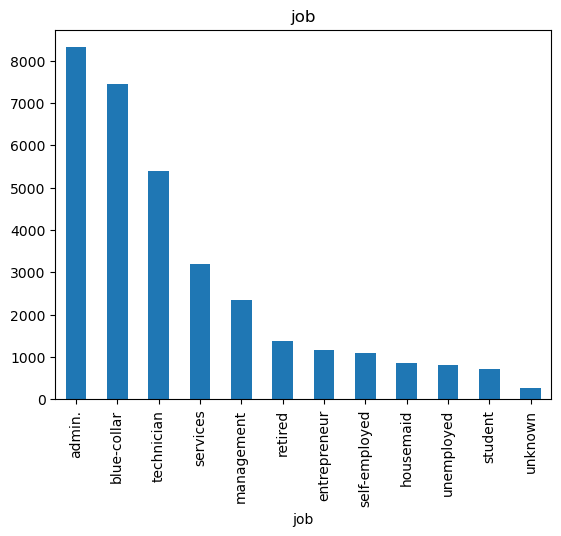

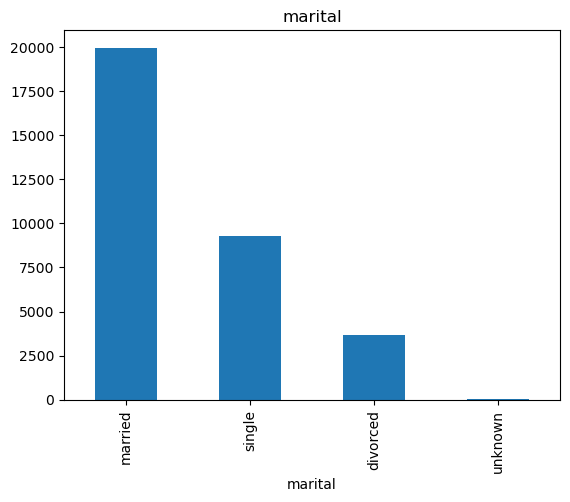

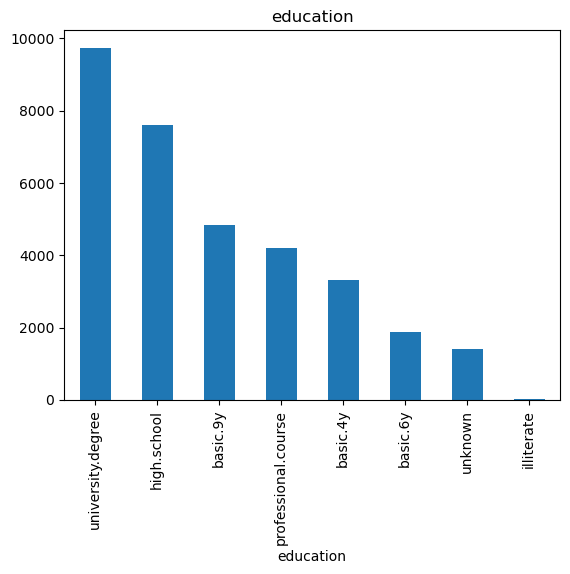

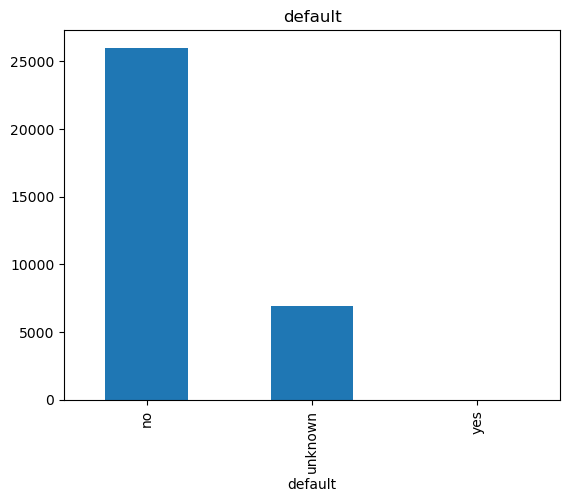

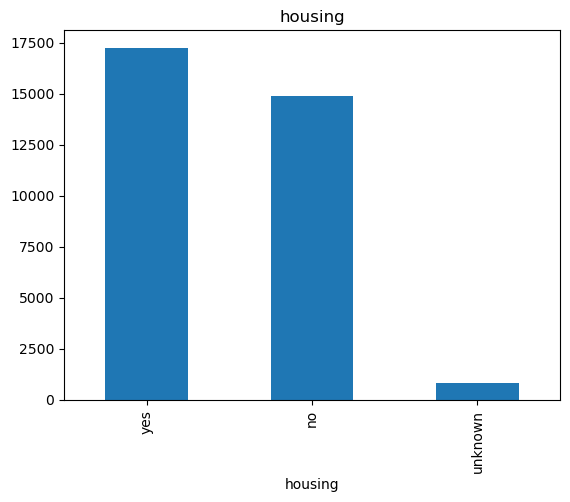

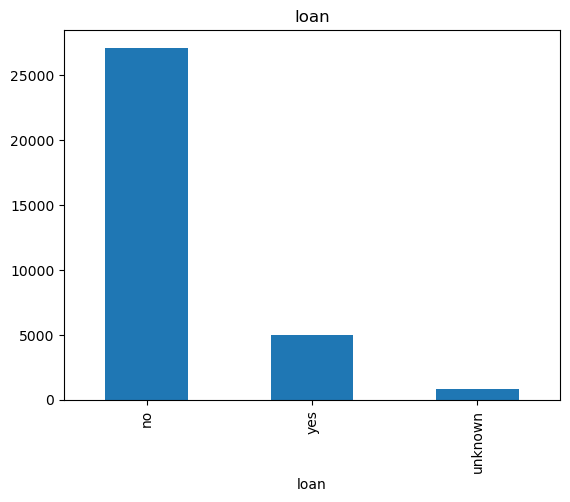

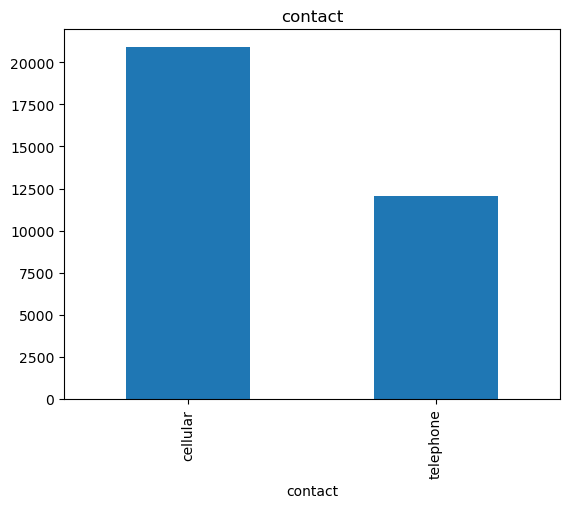

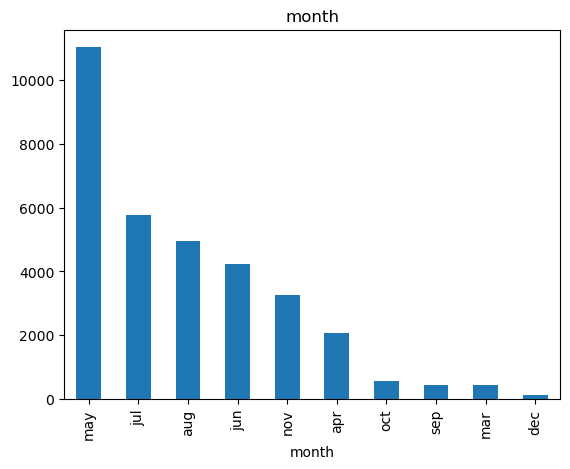

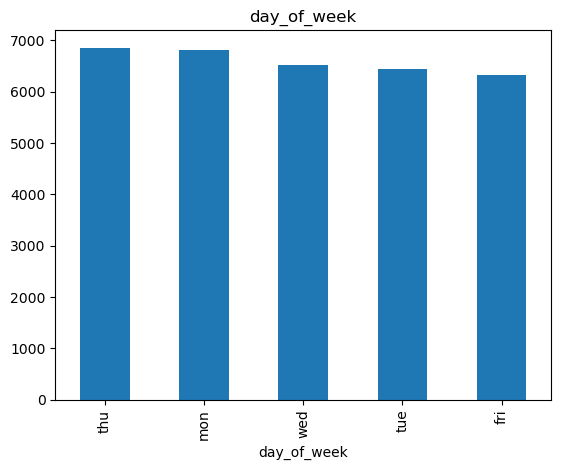

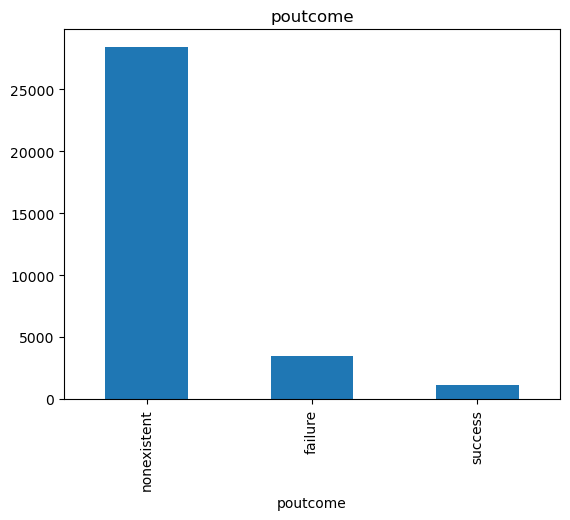

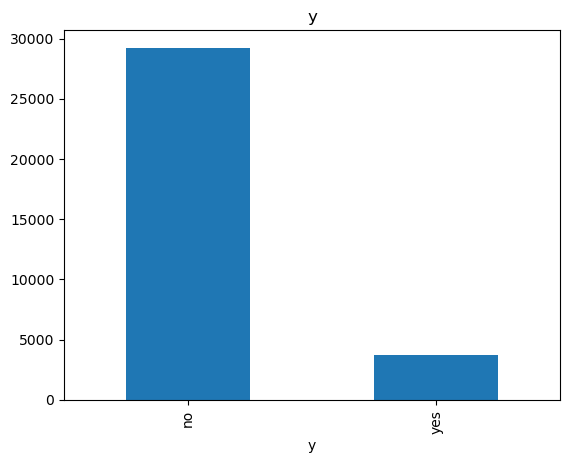

In [59]:
# plotting bar chart for each categorical variable
for c in cat_var:
    df[c].value_counts().plot(kind="bar")
    plt.title(c)
    plt.show()

In [60]:
## to predit target column no need of pdays and prevoious history column as they have similar count

df.drop(columns=["pdays","previous"], inplace=True)

In [61]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,no


In [62]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

<Axes: xlabel='age'>

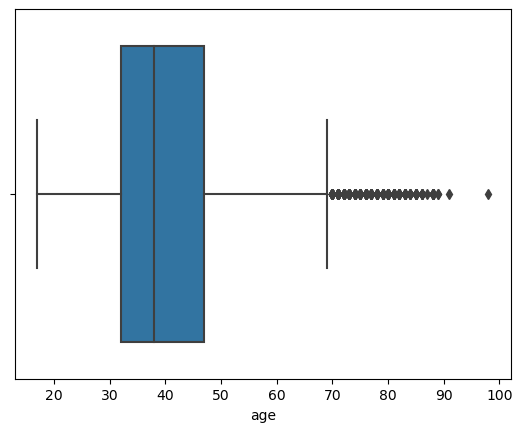

In [63]:
## outliers
sns.boxplot(x=df["age"])

<Axes: xlabel='campaign'>

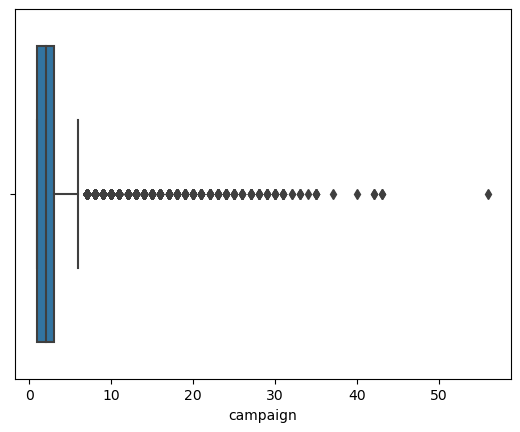

In [64]:
sns.boxplot(x=df["campaign"])

<Axes: xlabel='duration'>

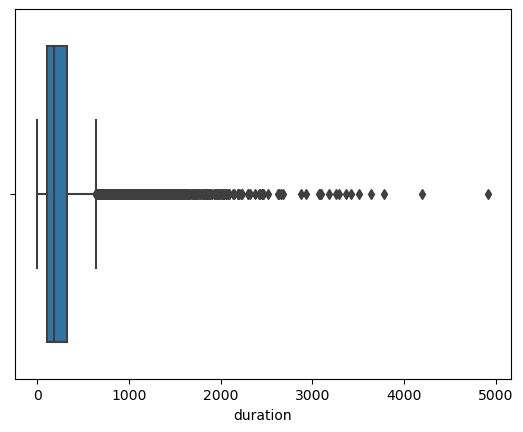

In [65]:
sns.boxplot(x=df["duration"])

# 4. Feature Engineering

#### handling outliers

In [66]:
# replace the all the outliers with mean of that specific column
df1=['age','duration','campaign']
def replace_outliers_with_mean(df1, column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df1[column] = np.where((df1[column] <= lower_bound) | (df1[column] >= upper_bound), df1[column].mean(), df1[column])
    return df1[column]
    

### Encoding Categorical Features

In [67]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [68]:
# converting categorical columns to numeric data
from sklearn.preprocessing import LabelEncoder

In [69]:
for i in cat_var:
    label_encoder = LabelEncoder()
    le_array = label_encoder.fit_transform(df[i])
    df[i] = pd.DataFrame(le_array)

In [70]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


## To check no multicolinerarity

In [71]:
df1 = df.iloc[:,:13] 
vif_df = pd.DataFrame()
vif_df["Features"] =df1.columns
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [72]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_df["VIF"] = vif_list

In [73]:
vif_df

,Features,VIF
0,age,8.876067
1,job,2.063309
2,marital,4.261482
3,education,4.019011
4,default,1.000557
5,housing,2.177983
6,loan,1.178613
7,contact,1.785014
8,month,4.331971
9,day_of_week,2.919727


# 5. Feature Selection

In [74]:
df.corr()  # to check the correlation of each column 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
age,1.000000,-0.014263,-0.394549,-0.125549,0.002127,-0.002601,-0.004446,0.007760,-0.028014,-0.019359,-0.001841,0.003302,0.019864,0.028673
job,-0.014263,1.000000,0.028103,0.131251,0.015322,0.009210,-0.013945,-0.031371,-0.027566,-0.002116,-0.006689,-0.009297,0.006446,0.025676
marital,-0.394549,0.028103,1.000000,0.111112,-0.002680,0.017711,0.007988,-0.054023,-0.005747,0.002693,0.010440,-0.004009,0.004104,0.049361
education,-0.125549,0.131251,0.111112,1.000000,0.002874,0.022380,0.010166,-0.109040,-0.085088,-0.016576,-0.017896,-0.001395,0.016647,0.058562
default,0.002127,0.015322,-0.002680,0.002874,1.000000,-0.004112,-0.004047,-0.007242,-0.005074,0.006811,-0.005704,-0.004255,-0.006886,-0.003400
housing,-0.002601,0.009210,0.017711,0.022380,-0.004112,1.000000,0.037050,-0.078204,-0.016748,0.003664,-0.010150,-0.013757,-0.015725,0.009753
loan,-0.004446,-0.013945,0.007988,0.010166,-0.004047,0.037050,1.000000,-0.014854,-0.008315,-0.012768,0.004160,0.005861,-0.002950,-0.000499
contact,0.007760,-0.031371,-0.054023,-0.109040,-0.007242,-0.078204,-0.014854,1.000000,0.275416,-0.007182,-0.026148,0.074217,0.121541,-0.143238
month,-0.028014,-0.027566,-0.005747,-0.085088,-0.005074,-0.016748,-0.008315,0.275416,1.000000,0.023675,0.001216,-0.061558,-0.065620,-0.007508
day_of_week,-0.019359,-0.002116,0.002693,-0.016576,0.006811,0.003664,-0.012768,-0.007182,0.023675,1.000000,0.022589,-0.035588,0.014240,0.011926


<Axes: >

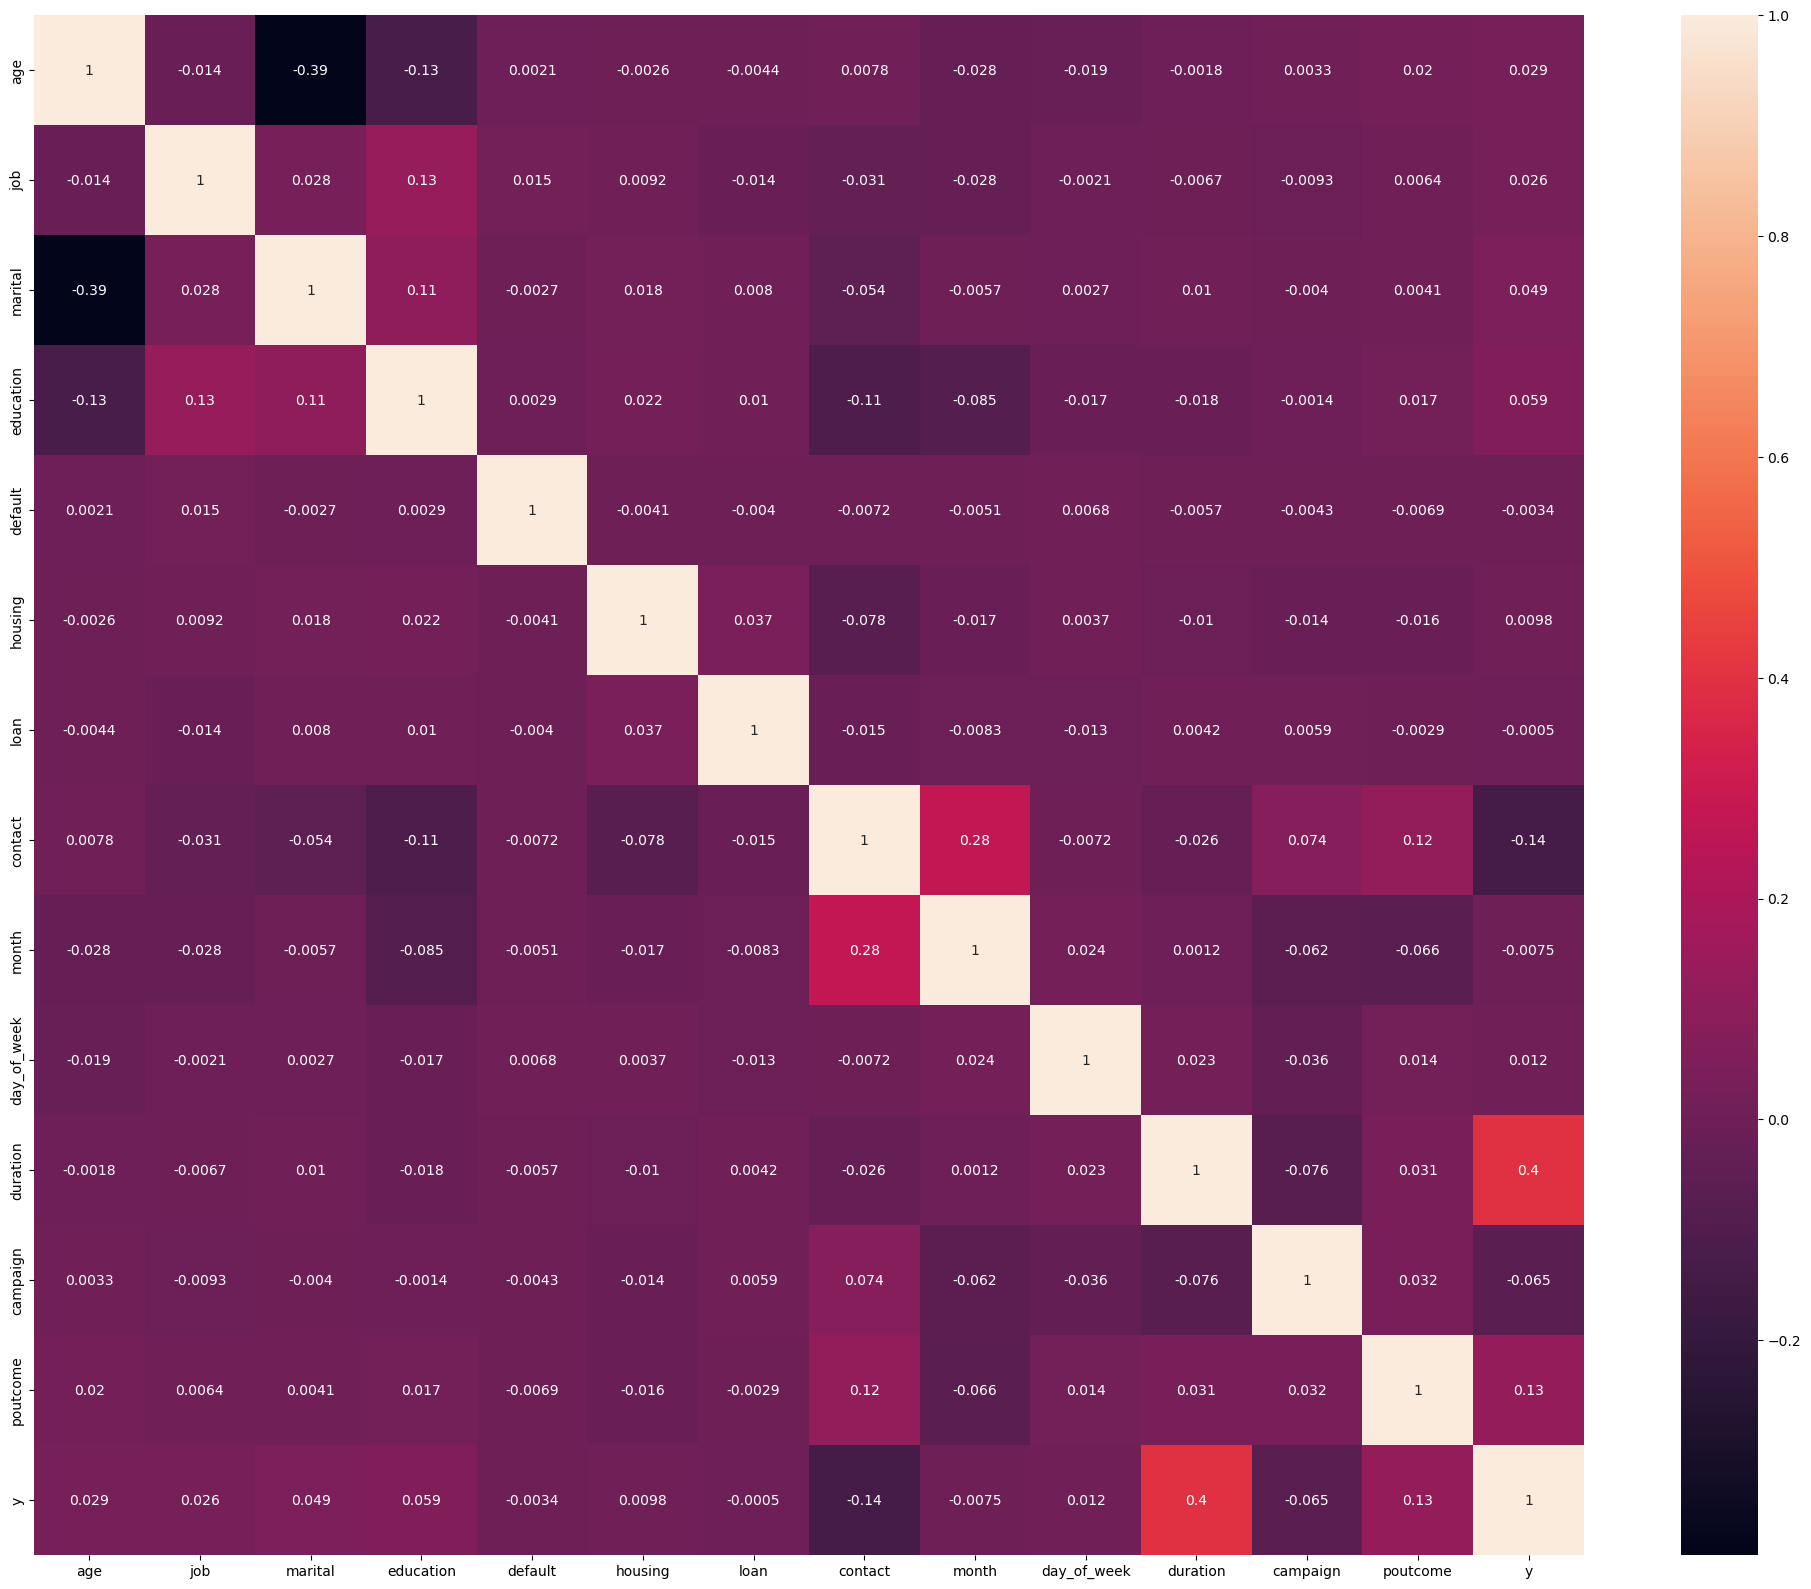

In [75]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)  # check correlation using heatmap

C:\Users\swarali chande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


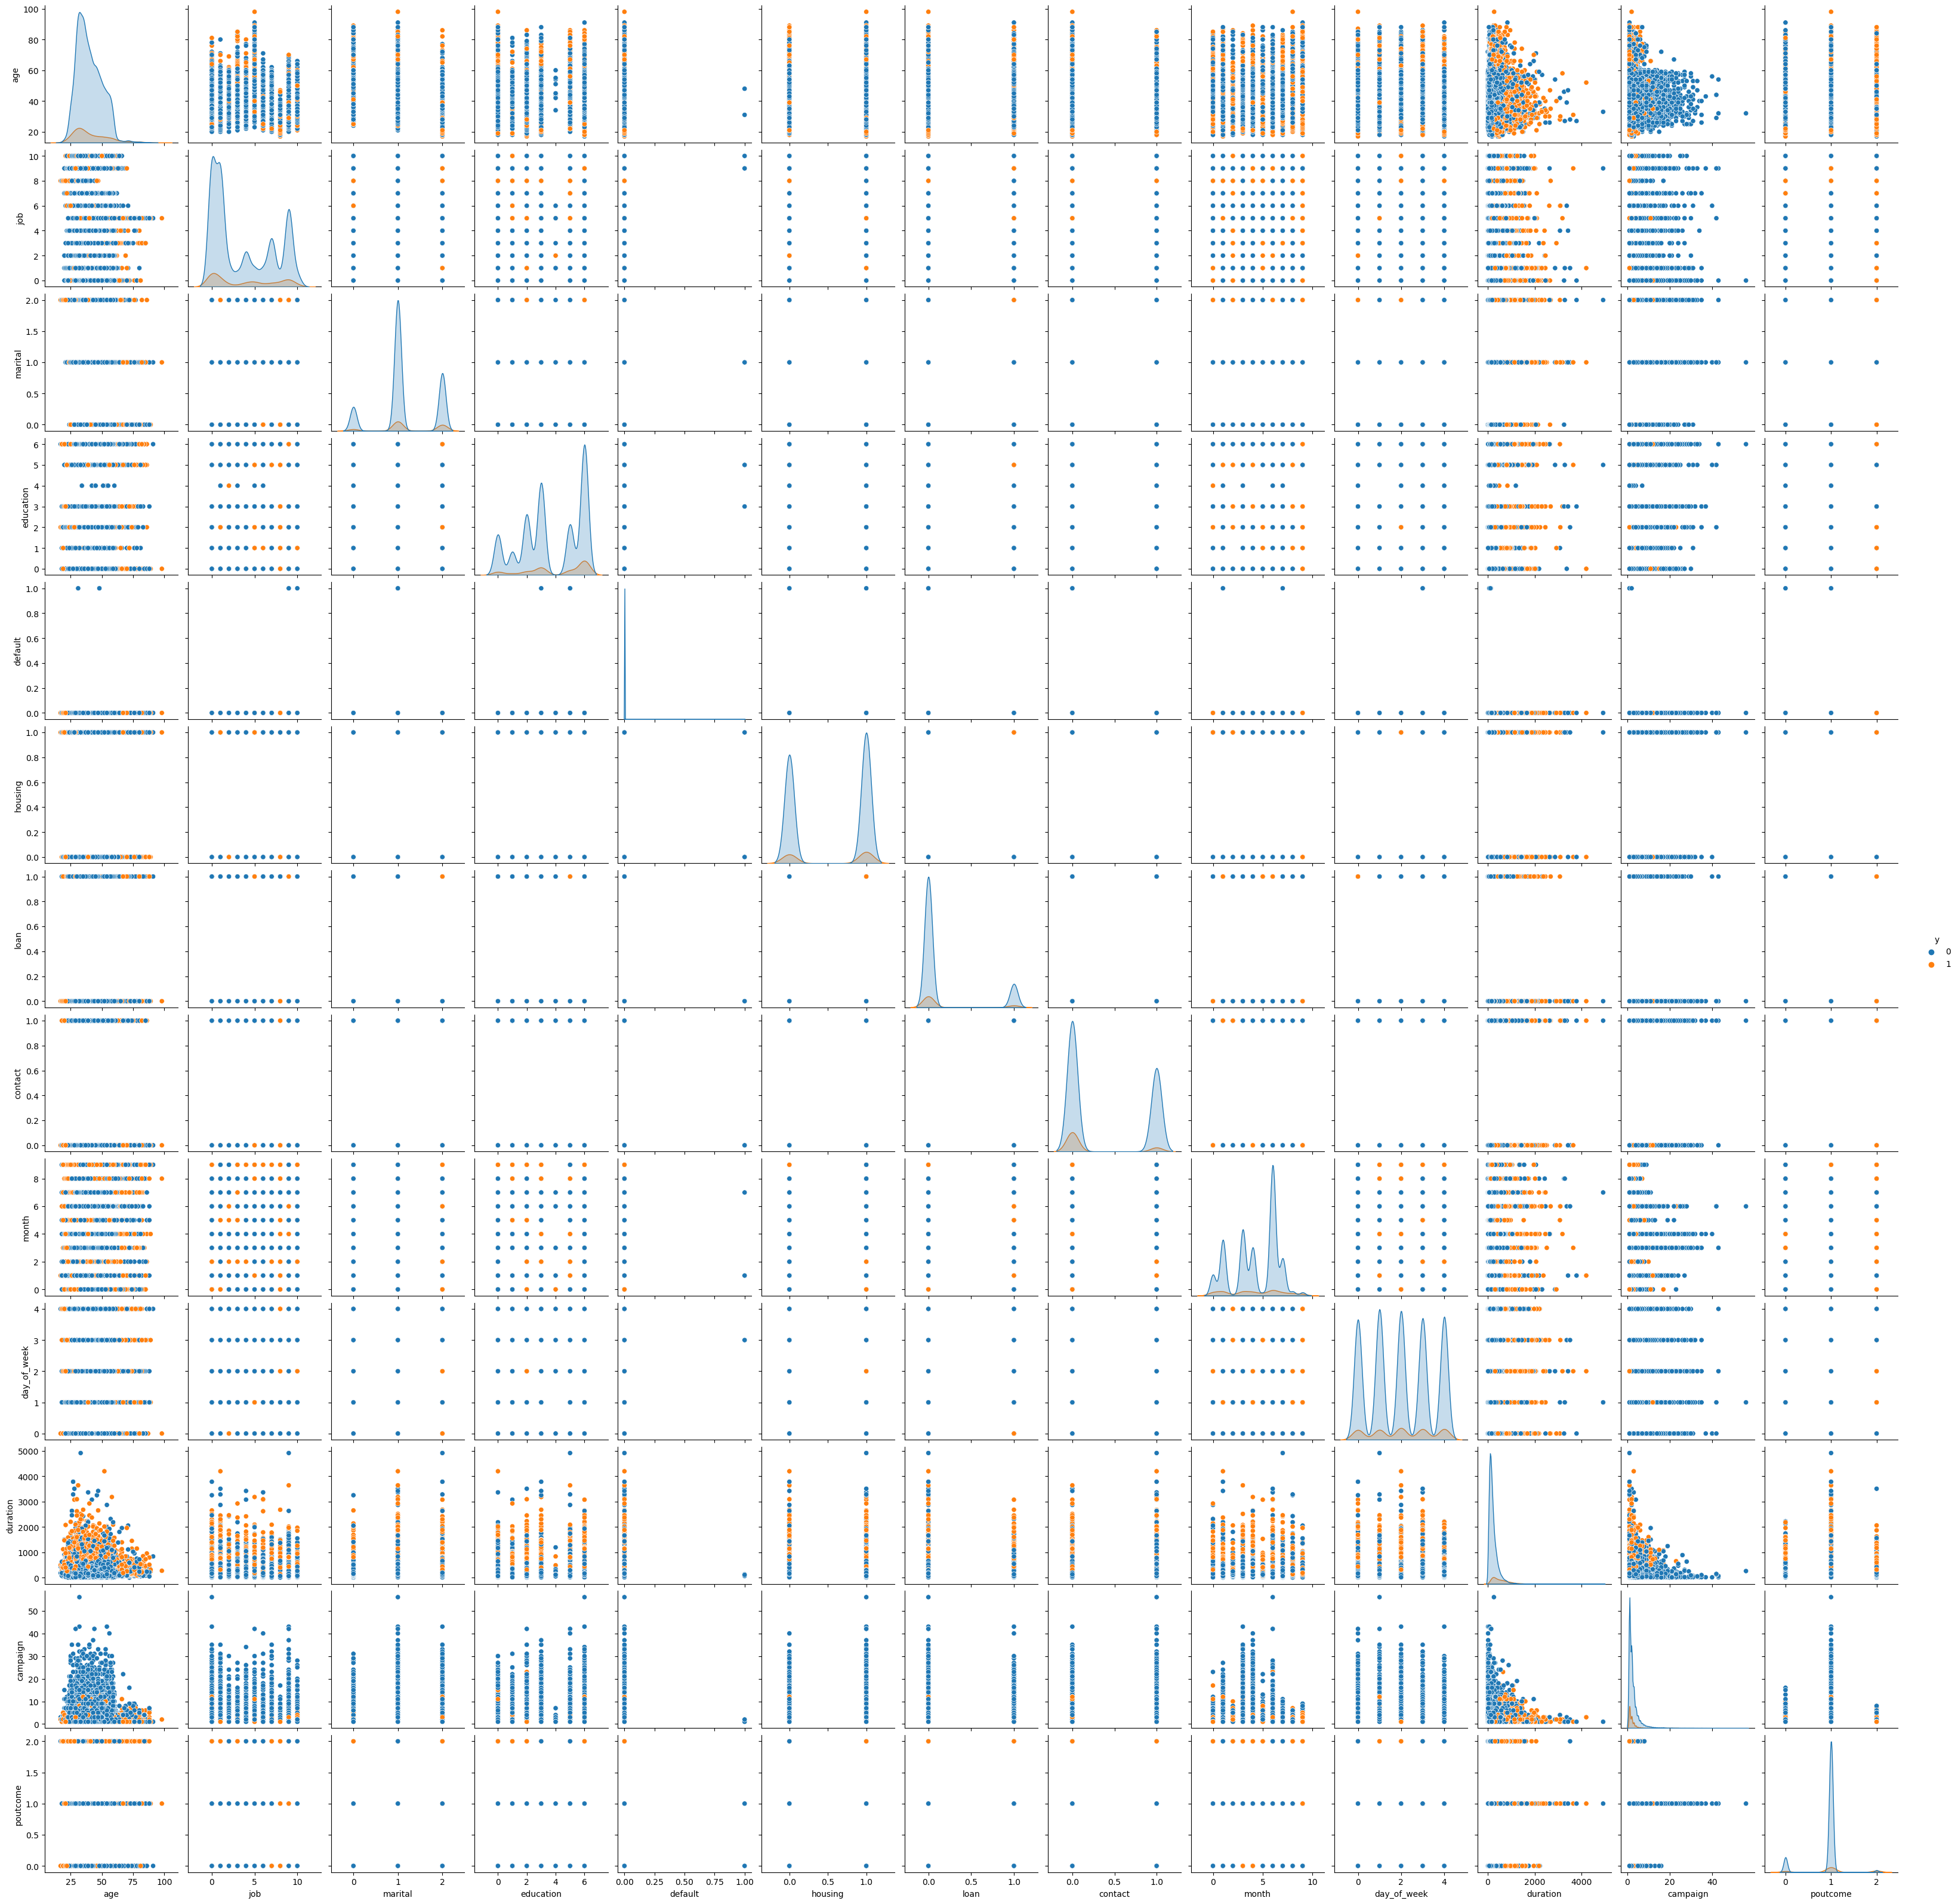

In [76]:
sns.pairplot(df, hue="y")

In [77]:
pd.value_counts(df["y"])

y
0    29238
1     3712
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

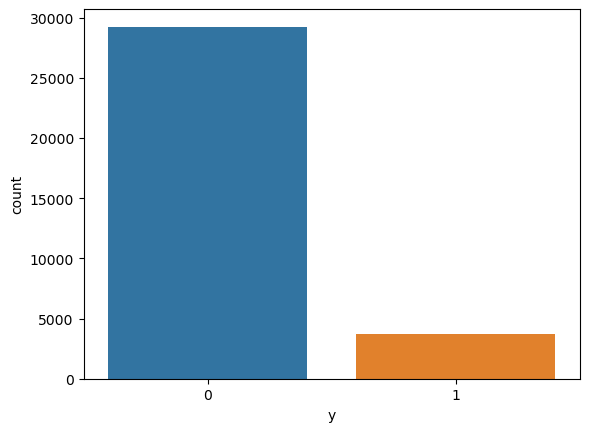

In [78]:
sns.countplot(x=df["y"])

In [79]:
# balance the imbalance data using oversampling method
from sklearn.utils import resample

# oversampling the minority class
minority_class = df[df['y'] == 1]
majority_class = df[df['y'] == 0]

minority_class_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Concatenate the oversampled minority class with the majority class
df_balanced = pd.concat([majority_class, minority_class_oversampled])


In [80]:
# balanced data after resampling
df_balanced

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,1,0
5,29,0,2,6,0,0,0,0,1,4,256,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21254,31,2,1,1,0,1,1,0,3,1,782,1,1,1
11807,26,0,2,3,0,1,0,0,7,1,262,1,2,1
17069,27,1,2,2,0,1,1,0,6,2,224,4,1,1
10648,29,0,2,6,0,1,1,0,1,2,254,3,2,1


In [81]:
pd.value_counts(df_balanced["y"]) ## to check the count of y after resampling

y
0    29238
1    29238
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

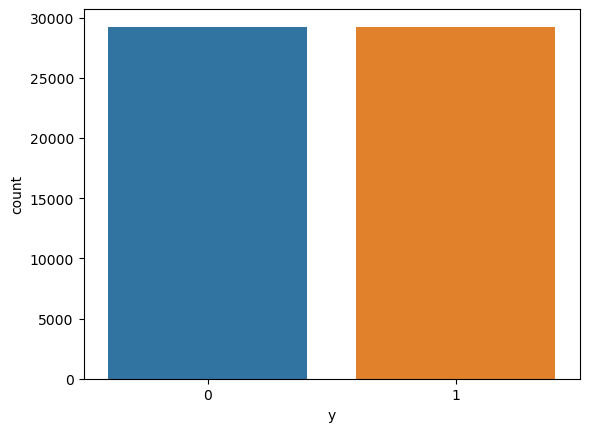

In [82]:
sns.countplot(x=df_balanced["y"])  # countplot of y after resampling

In [83]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58476 entries, 0 to 22564
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          58476 non-null  int64
 1   job          58476 non-null  int32
 2   marital      58476 non-null  int32
 3   education    58476 non-null  int32
 4   default      58476 non-null  int32
 5   housing      58476 non-null  int32
 6   loan         58476 non-null  int32
 7   contact      58476 non-null  int32
 8   month        58476 non-null  int32
 9   day_of_week  58476 non-null  int32
 10  duration     58476 non-null  int64
 11  campaign     58476 non-null  int64
 12  poutcome     58476 non-null  int32
 13  y            58476 non-null  int32
dtypes: int32(11), int64(3)
memory usage: 4.2 MB


# 6. model training

### train test split

In [17]:
x = df_balanced.iloc[:,:-1]
y = df_balanced["y"]

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
xtrain.shape

(46780, 13)

In [25]:
ytrain.shape

(46780,)

In [26]:
xtest.shape

(11696, 13)

In [27]:
ytest.shape

(11696,)

## 1. Model training: Logistic Regression

In [134]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [135]:
log_reg_model = log_reg.fit(xtrain,ytrain)  # fit model into training data
log_reg_model

C:\Users\swarali chande\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## model evaluation

In [136]:
ytrain_predict = log_reg_model.predict(xtrain)

### evaluation on training data

In [137]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"The Accuracy Score = {accuracy}\n")

con_mat = confusion_matrix(ytrain,ytrain_predict)
print(f"The Confusion Matrix : \n{con_mat}\n")

class_report = classification_report(ytrain,ytrain_predict)
print(f"the Classification report : \n{clss_report}")
 

print(f"The Accuracy Score on training data: {accuracy}")

Accuracy Score = 0.7718469431380932

Confusion Matrix : 
[[17935  5435]
 [ 5238 18172]]

Classification report : 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     23370
           1       0.77      0.78      0.77     23410

    accuracy                           0.77     46780
   macro avg       0.77      0.77      0.77     46780
weighted avg       0.77      0.77      0.77     46780

Accuracy Score on training data: 0.7718469431380932


#### Accuracy on training data using logistic regression : 0.77

## evaluation on testing data

In [138]:
ytest_pred = log_reg_model.predict(xtest)

In [139]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy Score = {accuracy}\n")


con_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{con_mat}\n")


clss_report = classification_report(ytest,ytest_pred)
print(f"Classification report : \n{clss_report}\n")


Accuracy Score = 0.7834302325581395

Confusion Matrix : 
[[4571 1297]
 [1236 4592]]

Classification report : 
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      5868
           1       0.78      0.79      0.78      5828

    accuracy                           0.78     11696
   macro avg       0.78      0.78      0.78     11696
weighted avg       0.78      0.78      0.78     11696




#### The Accuracy Score on testing data using logistic: 0.78

## 2. Model training by :Decision Tree

In [140]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [141]:
dt_clf_model = dt_clf.fit(xtrain,ytrain) 
dt_clf_model

DecisionTreeClassifier()

In [142]:
ytrain

13289    1
21059    1
21968    0
18140    1
12683    0
        ..
31560    0
31946    1
32906    0
6397     1
19928    0
Name: y, Length: 46780, dtype: int32

In [143]:
ytrain_pred = dt_clf_model.predict(xtrain)

In [144]:
ytrain_pred

array([1, 1, 0, ..., 0, 1, 0])

## model evaluation on training data

Acccuracy =  0.9998717400598547

Confusion matrix : 
[[23364     6]
 [    0 23410]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23370
           1       1.00      1.00      1.00     23410

    accuracy                           1.00     46780
   macro avg       1.00      1.00      1.00     46780
weighted avg       1.00      1.00      1.00     46780



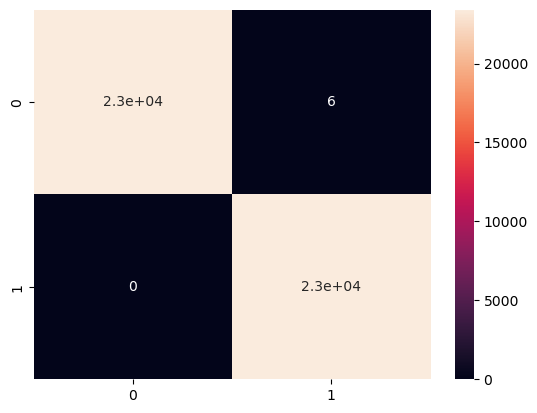

In [145]:
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytrain,ytrain_pred), annot=True)
print(f"\nConfusion matrix : \n{confusion_matrix(ytrain,ytrain_pred)}")
      
clf_report = classification_report(ytrain,ytrain_pred)
print(f"\nClassification Report : \n", clf_report)

#### Accuracy of training data by using decision tree: 0.99

## model evaluation on testing data

In [146]:
#for testing data
ytest_pred = dt_clf_model.predict(xtest)

Acccuracy =  0.9622093023255814

Confusion matrix : 
[[5431  437]
 [   5 5823]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      5868
           1       0.93      1.00      0.96      5828

    accuracy                           0.96     11696
   macro avg       0.96      0.96      0.96     11696
weighted avg       0.96      0.96      0.96     11696



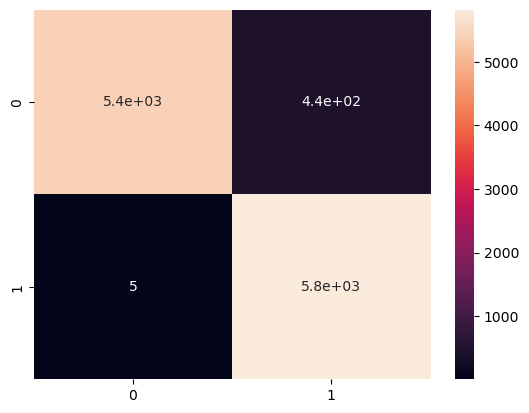

In [147]:
acc = accuracy_score(ytest,ytest_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytest,ytest_pred), annot=True)
print(f"\nConfusion matrix : \n{confusion_matrix(ytest,ytest_pred)}")
      
clf_report = classification_report(ytest,ytest_pred)
print(f"\nClassification Report : \n", clf_report)

#### Accuracy on testing data using decision tree : 0.96

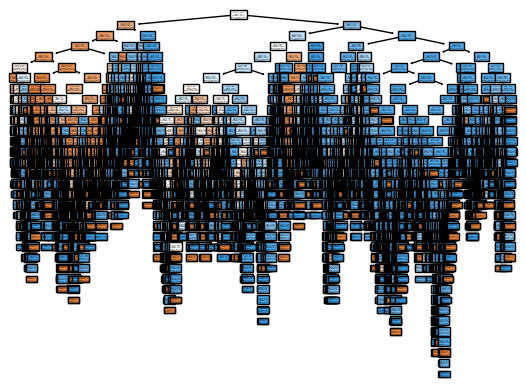

In [79]:
plot_tree(dt_clf_model,feature_names= None, class_names=["yes","no"],filled=True)
plt.savefig("decision_tree")

## Decision tree with hyperparameter tunning

In [148]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(3,10)
}

In [149]:
gscv = GridSearchCV(dt_clf_model, hyperparameters, cv = 5)
gscv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [150]:
dt_clf_hyp_model = gscv.fit(xtrain,ytrain)
dt_clf_hyp_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [151]:
dt_clf_hyp_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)

In [152]:
dt_hyp = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)

In [153]:
dt_hyp_model = dt_hyp.fit(xtrain,ytrain)
dt_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)

### evaluation on training data

In [154]:
ytrain_pred = dt_hyp_model.predict(xtrain)

Acccuracy =  0.8456391620350577

Confusion matrix : 
[[19934  3436]
 [ 3785 19625]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85     23370
           1       0.85      0.84      0.84     23410

    accuracy                           0.85     46780
   macro avg       0.85      0.85      0.85     46780
weighted avg       0.85      0.85      0.85     46780



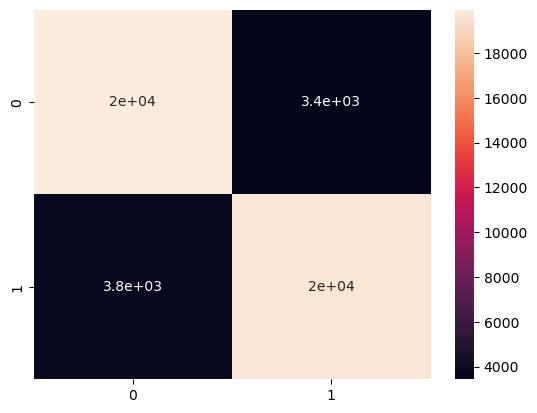

In [155]:
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytrain,ytrain_pred), annot=True)
print(f"\nConfusion matrix : \n{confusion_matrix(ytrain,ytrain_pred)}")
      
clf_report = classification_report(ytrain,ytrain_pred)
print(f"\nClassification Report : \n", clf_report)

#### decision tree with hyperparameter tunning on training data : 0.84

## evaluation on testing data

In [156]:
ytest_pred = dt_hyp_model.predict(xtest)

Acccuracy =  0.8434507523939808
/nConfusion matrix : 
[[4974  894]
 [ 937 4891]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      5868
           1       0.85      0.84      0.84      5828

    accuracy                           0.84     11696
   macro avg       0.84      0.84      0.84     11696
weighted avg       0.84      0.84      0.84     11696



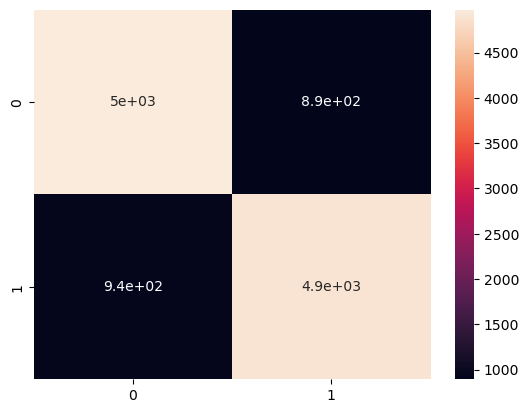

In [157]:
acc = accuracy_score(ytest,ytest_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytest,ytest_pred), annot=True)
print(f"/nConfusion matrix : \n{confusion_matrix(ytest,ytest_pred)}")
      
clf_report = classification_report(ytest,ytest_pred)
print(f"\nClassification Report : \n", clf_report)

#### decision tree with hyperparameter tunning on testing data: 0.84

##  feature selection

In [158]:
dt_clf.feature_importances_ #feature selection : for after model traing

array([0.1126789 , 0.03821478, 0.02062095, 0.03674131, 0.        ,
       0.01735251, 0.00987781, 0.03519908, 0.13923158, 0.04518765,
       0.37809719, 0.035718  , 0.13108024])

In [159]:
s1 = pd.Series(dt_clf.feature_importances_,index = x.columns)
s1

age            0.112679
job            0.038215
marital        0.020621
education      0.036741
default        0.000000
housing        0.017353
loan           0.009878
contact        0.035199
month          0.139232
day_of_week    0.045188
duration       0.378097
campaign       0.035718
poutcome       0.131080
dtype: float64

<Axes: >

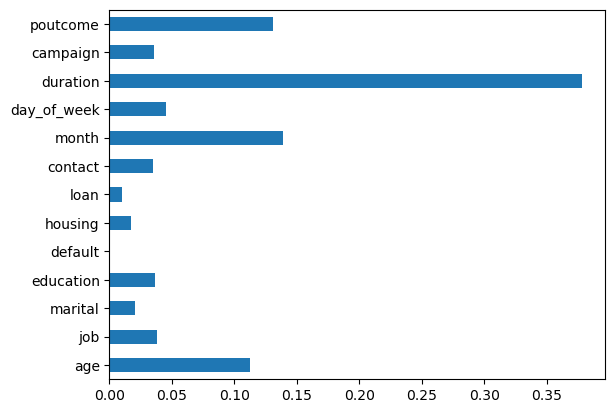

In [160]:
s1.plot(kind="barh") # ploting important features using bar graph

In [161]:
dt_hyp_model.feature_importances_

array([0.06575554, 0.00779034, 0.00471254, 0.01002321, 0.        ,
       0.00161555, 0.00139879, 0.07168883, 0.13337276, 0.0084455 ,
       0.50768258, 0.00947615, 0.17803821])

In [162]:
s1 = pd.Series(dt_hyp_model.feature_importances_,index=x.columns)
s1

age            0.065756
job            0.007790
marital        0.004713
education      0.010023
default        0.000000
housing        0.001616
loan           0.001399
contact        0.071689
month          0.133373
day_of_week    0.008445
duration       0.507683
campaign       0.009476
poutcome       0.178038
dtype: float64

<Axes: >

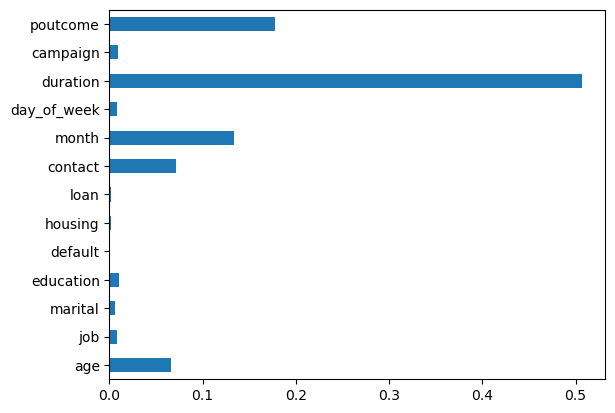

In [99]:
s1.plot(kind="barh") # ploting important features using bar graph

### by the above algorithm we get to know that to predict the target column poutcome and duration feature are important

## 3. Model Training by : Random Forest Classifier

In [28]:
random_forest = RandomForestClassifier()
random_Forest_model = random_forest.fit(xtrain,ytrain)
random_Forest_model

RandomForestClassifier()

In [29]:
ytrain

13289    1
21059    1
21968    0
18140    1
12683    0
        ..
31560    0
31946    1
32906    0
6397     1
19928    0
Name: y, Length: 46780, dtype: int32

### evaluation matrix for training data

In [30]:
ytrain_pred = random_Forest_model.predict(xtrain)

Acccuracy =  0.9998717400598547
Confusion matrix : 
[[23364     6]
 [    0 23410]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23370
           1       1.00      1.00      1.00     23410

    accuracy                           1.00     46780
   macro avg       1.00      1.00      1.00     46780
weighted avg       1.00      1.00      1.00     46780



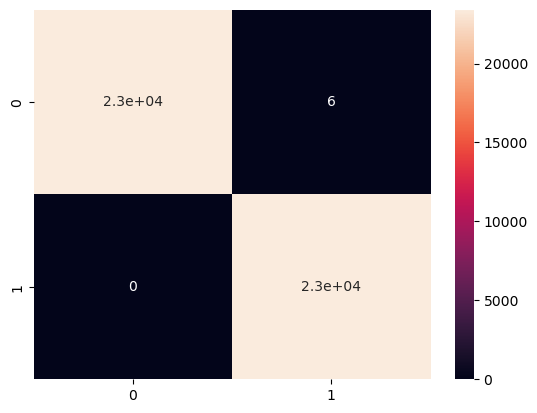

In [31]:
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytrain,ytrain_pred), annot=True)
print(f"Confusion matrix : \n{confusion_matrix(ytrain,ytrain_pred)}")
      
clf_report = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n", clf_report)

### accuracy score for random forest by evaluation matrix: 0.99

### evaluation matrix for testing data

In [167]:
ypred_test = random_Forest_model.predict(xtest)

Acccuracy =  0.9701607387140903
Confusion matrix : 
[[5525  343]
 [   6 5822]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      5868
           1       0.94      1.00      0.97      5828

    accuracy                           0.97     11696
   macro avg       0.97      0.97      0.97     11696
weighted avg       0.97      0.97      0.97     11696



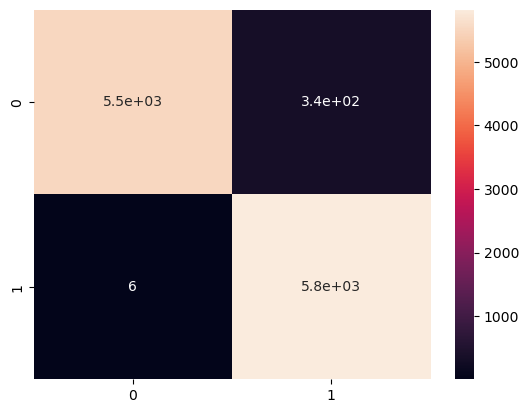

In [168]:
acc = accuracy_score(ytest,ypred_test)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytest,ypred_test), annot=True)
print(f"Confusion matrix : \n{confusion_matrix(ytest,ypred_test)}")
      
clf_report = classification_report(ytest,ypred_test)
print(f"Classification Report : \n", clf_report)

### accuracy score for random forest by evaluation matrix on testing data: 0.97

### random forest by hyperparameter tunning

In [32]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(3,10),
    "n_estimators" :np.arange(20,100)
} 

In [33]:
rscv = RandomizedSearchCV(random_Forest_model,hyperparameters,cv=5)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [34]:
rscv_clf_model=rscv.fit(xtrain,ytrain)
rscv_clf_model

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [35]:
rscv_clf_model.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=25)

In [36]:
rscv = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,min_samples_split=6, n_estimators=25)
rscv_model= rscv.fit(xtrain,ytrain)
rscv_model

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=25)

### model evaluation for training data

In [37]:
ytrain_pred = random_Forest_model.predict(xtrain)

Acccuracy =  0.9998717400598547

Confusion matrix : 
[[23364     6]
 [    0 23410]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23370
           1       1.00      1.00      1.00     23410

    accuracy                           1.00     46780
   macro avg       1.00      1.00      1.00     46780
weighted avg       1.00      1.00      1.00     46780



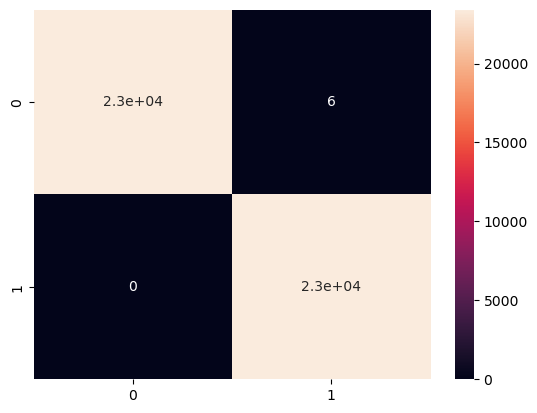

In [38]:
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytrain,ytrain_pred), annot=True)
print(f"\nConfusion matrix : \n{confusion_matrix(ytrain,ytrain_pred)}")
      
clf_report = classification_report(ytrain,ytrain_pred)
print(f"\nClassification Report : \n", clf_report)

### model evaluation for testing data

In [39]:
ytest_pred = random_Forest_model.predict(xtest)

Acccuracy =  0.9704172366621067
Confusion matrix : 
[[5530  338]
 [   8 5820]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      5868
           1       0.95      1.00      0.97      5828

    accuracy                           0.97     11696
   macro avg       0.97      0.97      0.97     11696
weighted avg       0.97      0.97      0.97     11696



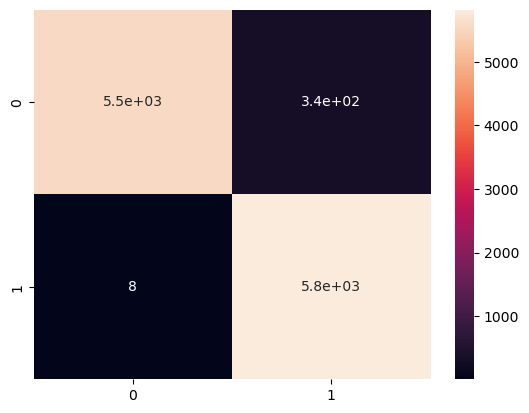

In [40]:
acc = accuracy_score(ytest,ytest_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytest,ytest_pred), annot=True)
print(f"Confusion matrix : \n{confusion_matrix(ytest,ytest_pred)}")
      
clf_report = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n", clf_report)

## 4. Model Training by : Adaboost Classifier

In [178]:
ada_boost = AdaBoostClassifier()
ada_boost_model = ada_boost.fit(xtrain,ytrain)
ada_boost_model

AdaBoostClassifier()

In [179]:
ytrain_pred = ada_boost_model.predict(xtrain)

## model training by evaluation matrix on trainingg data

Acccuracy =  0.8394185549380077

Confusion matrix : 
[[19790  3580]
 [ 3932 19478]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     23370
           1       0.84      0.83      0.84     23410

    accuracy                           0.84     46780
   macro avg       0.84      0.84      0.84     46780
weighted avg       0.84      0.84      0.84     46780



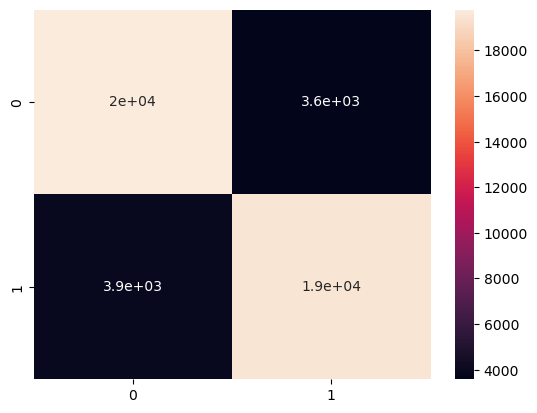

In [180]:
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytrain,ytrain_pred), annot=True)
print(f"\nConfusion matrix : \n{confusion_matrix(ytrain,ytrain_pred)}")
      
clf_report = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n", clf_report)

### accuracy on trianing data : 0.83

## model evaluation on testing data

In [181]:
ytest_pred = ada_boost_model.predict(xtest)

Acccuracy =  0.8434507523939808
Confusion matrix : 
[[4983  885]
 [ 946 4882]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      5868
           1       0.85      0.84      0.84      5828

    accuracy                           0.84     11696
   macro avg       0.84      0.84      0.84     11696
weighted avg       0.84      0.84      0.84     11696



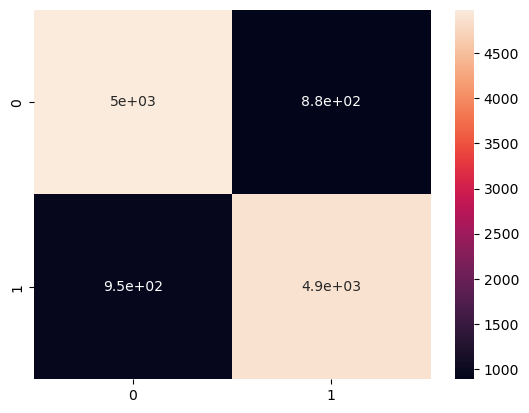

In [182]:
acc = accuracy_score(ytest,ytest_pred)
print(f"Acccuracy = ",acc)

conf_mat = sns.heatmap(confusion_matrix(ytest,ytest_pred), annot=True)
print(f"Confusion matrix : \n{confusion_matrix(ytest,ytest_pred)}")
      
clf_report = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n", clf_report)

### model evaluation on testing data: 0.84

## 5. Model training : SVC (Support Vector Classification)

In [1]:
from sklearn.svm import SVC

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=11)

In [19]:
svc = SVC()
svc_model = svc.fit(xtrain,ytrain)
svc_model

SVC()

### evaluation for training data

In [20]:
ytrain_pred = svc_model.predict(xtrain)

In [21]:
acc = accuracy_score(ytrain,ytrain_pred)
print(acc)
conf_mat = confusion_matrix(ytrain,ytrain_pred)
print(conf_mat)
clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification report : \n",clf_rep)

0.7365113296280462
[[17602  5725]
 [ 6601 16852]]
Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74     23327
           1       0.75      0.72      0.73     23453

    accuracy                           0.74     46780
   macro avg       0.74      0.74      0.74     46780
weighted avg       0.74      0.74      0.74     46780



### evaluation for testing data

In [22]:
ytest_pred = svc_model.predict(xtest)

In [23]:
acc = accuracy_score(ytest,ytest_pred)
print(acc)
conf_mat = confusion_matrix(ytest,ytest_pred)
print(conf_mat)
clf_rep = classification_report(ytest,ytest_pred)
print("Classification report : \n",clf_rep)

0.7339261285909713
[[4411 1500]
 [1612 4173]]
Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      5911
           1       0.74      0.72      0.73      5785

    accuracy                           0.73     11696
   macro avg       0.73      0.73      0.73     11696
weighted avg       0.73      0.73      0.73     11696



In [ ]:
## with hyperparameter
hyperparameter = {"kernel":["linear","rbf"],
      "C" : np.arange(1,10)}

In [ ]:
gscv = GridSearchCV(svc_model,hyperparameter,cv=5)

### Result of model training based on different algorithms 

## save finalized model(random Forest with Hyperparamter Tunning) in pickle file

In [84]:
import pickle

In [42]:
with open("Final_model.pkl","wb") as f:
        pickle.dump(rscv_clf_model,f)

## check result by taking input from user

In [85]:
def deposit_pred(age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome):
    data = {"age":[age],
           "job":[job],
           "marital":[marital],
           "education":[education],
           "default":[default],
           "housing":[housing],
           "loan":[loan],
           "contact":[contact],
           "month":[month],
           "day_of_week":[day_of_week],
           "duration":[duration],
           "campaign":[campaign],
           "poutcome":[poutcome]}
    test_df = pd.DataFrame(data)
    
    with open("Final_model.pkl","rb") as f:
        final = pickle.load(f)
        
    prediction = final.predict(test_df)
    
    if prediction == 1:
        print("Patient is eligible to subscribe for deposit")
    else:
        print("Patient is not eligible to subscribe for deposit")

In [86]:
deposit_pred(49,1,1,2,0,0,0,0,7,4,227,4,1)

Patient is not eligible to subscribe for deposit


In [87]:
deposit_pred(31,2,1,1,0,1,1,0,3,1,643,1,1)

Patient is eligible to subscribe for deposit
